In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [7]:
open2D = xr.open_dataset("../model_outputs/open/fields_biogem_2d.nc")
open3D = xr.open_dataset("../model_outputs/open/fields_biogem_3d.nc")
closed2D = xr.open_dataset("../model_outputs/close/fields_biogem_2d.nc")
closed3D = xr.open_dataset("../model_outputs/close/fields_biogem_3d.nc")

In [17]:
# pick ocean properties
u_open = open3D["phys_ocn_u"].isel(time=-1).isel(zt=16) # m/s
u_close = closed3D["phys_ocn_u"].isel(time=-1) # m/s
v_open = open3D["phys_ocn_v"].isel(time=-1) # m/s
v_close = closed3D["phys_ocn_v"].isel(time=-1) # m/s

barot_stream_open = open2D["phys_psi"].isel(time=-1) # Sv
barot_stream_close = closed2D["phys_psi"].isel(time=-1) # Sv

sss_open = open2D["ocn_sur_sal"].isel(time=-1) # Sv
sss_close = closed2D["ocn_sur_sal"].isel(time=-1) # Sv

glob_opsi_open = open2D["phys_opsi"].isel(time=-1) # Sv
glob_opsi_close = closed2D["phys_opsi"].isel(time=-1) # Sv

In [22]:
# anomaly calculation
u_anom = u_close - u_open 
v_anom = v_close - v_open

barot_anom = barot_stream_close - barot_stream_open

sss_anom = sss_close - sss_open

glob_opsi_anom = glob_opsi_close - glob_opsi_open

TypeError: Shapes of x (36, 36) and z (37, 36) do not match

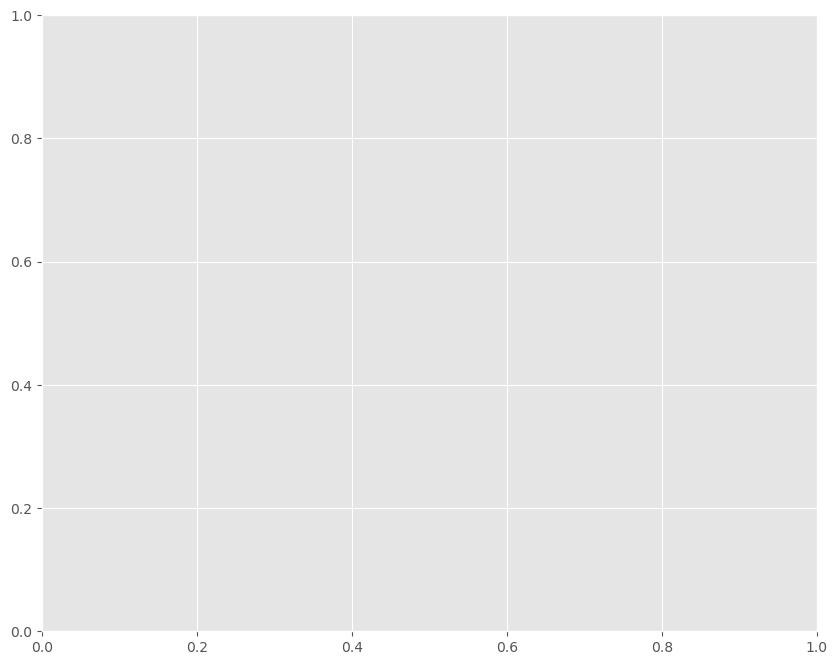

In [26]:
# open barotropic & u-v
# Create a meshgrid of coordinates for plotting
lon = u_open.lon
lat = u_open.lat
lon, lat = np.meshgrid(lon, lat)

fig, ax = plt.subplots(figsize=(10, 8))

contour = ax.contourf(lon, lat, barot_stream_open, cmap='viridis', levels=20)

quiver = ax.quiver(lon, lat, u_open, v_open, scale=10, color='white')

cbar = plt.colorbar(contour, ax=ax, orientation='vertical')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Barotropic Streamfunction with Ocean Current Velocities')


In [28]:
u_open.isel(zt=-1)

<xarray.DataArray 'phys_ocn_u' (lat: 36, lon: 36)>
[1296 values with dtype=float32]
Coordinates:
    time     float64 5e+03
  * lon      (lon) float64 -255.0 -245.0 -235.0 -225.0 ... 65.0 75.0 85.0 95.0
  * lat      (lat) float64 -76.46 -66.44 -59.44 -53.66 ... 59.44 66.44 76.46
    zt       float64 4.604e+03
Attributes:
    long_name:  ocean physical properties - u